# Notebook for checking if we have a clear or dark background

This would be my second step for preprocessing. The first one was to convert all the DICOM images into JPEG images (NOTE: is this the best way to save these images? Maybe I should have used .tif or .png? Let's ask!). The second one is to check if it is light or dark background in the images. From a previous trial, I noticed that it might be different on for different patients. And from simple inspection on the folder train_images_jpeg we can see that it is the case. Let's plot some images!



In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

## Initial review of images

In [58]:
def plot_patient_image(n_patient):
    """Function to plot the raw status of the images on the jpeg folder. """
    parent_dir = '../data/train_images_jpeg/'
    patients = sorted(os.listdir('../data/train_images_jpeg/'))
    images_patient_1 = os.listdir(parent_dir + patients[n_patient])
    
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    im1 = cv2.imread(parent_dir + patients[n_patient] + '/' + images_patient_1[0], cv2.IMREAD_GRAYSCALE)
    plt.imshow(im1, 'gray')
    plt.axis('off')
    plt.title('Patient: ' + patients[n_patient] + '\n  Image: ' + images_patient_1[0])

    plt.subplot(2, 2, 2)
    im2 = cv2.imread(parent_dir + patients[n_patient] + '/' + images_patient_1[1], cv2.IMREAD_GRAYSCALE)
    plt.imshow(im2, 'gray')
    plt.axis('off')
    plt.title('Patient: ' + patients[n_patient] + ' \n Image: ' + images_patient_1[0])

    plt.subplot(2, 2, 3)
    im3 = cv2.imread(parent_dir + patients[n_patient] + '/' + images_patient_1[2], cv2.IMREAD_GRAYSCALE)
    plt.imshow(im3, 'gray')
    plt.axis('off')
    plt.title('Patient: ' + patients[n_patient] + ' \n Image: ' + images_patient_1[0])

    plt.subplot(2, 2, 4)
    im4 = cv2.imread(parent_dir + patients[n_patient] + '/' + images_patient_1[3], cv2.IMREAD_GRAYSCALE)
    plt.imshow(im4, 'gray')
    plt.axis('off')
    plt.title('Patient: ' + patients[n_patient] + ' \n Image: ' + images_patient_1[0])

    plt.show()

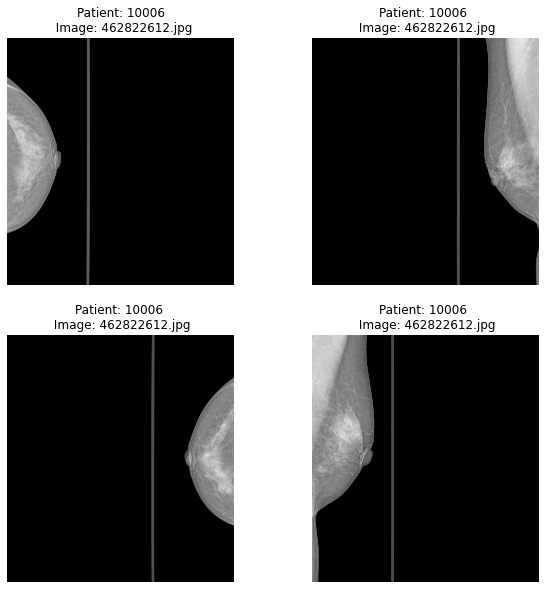

In [59]:
plot_patient_image(1)

Note that the images have different sizes. Which IS a problem on our analysis. Note also that the images on the second patient are annotated with the view on the x-ray. Therefore, I am assuming that they were taken in different locations within the US. This makes us create a pipeline that removes the annotations on the images!

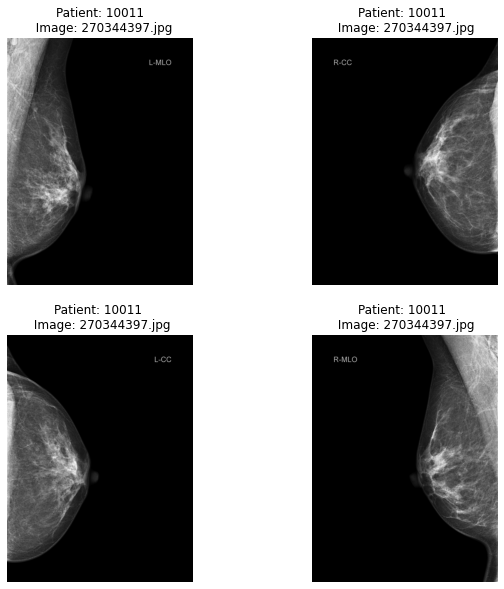

In [61]:
plot_patient_image(2)

## Histograms:

(0.0, 100000.0)

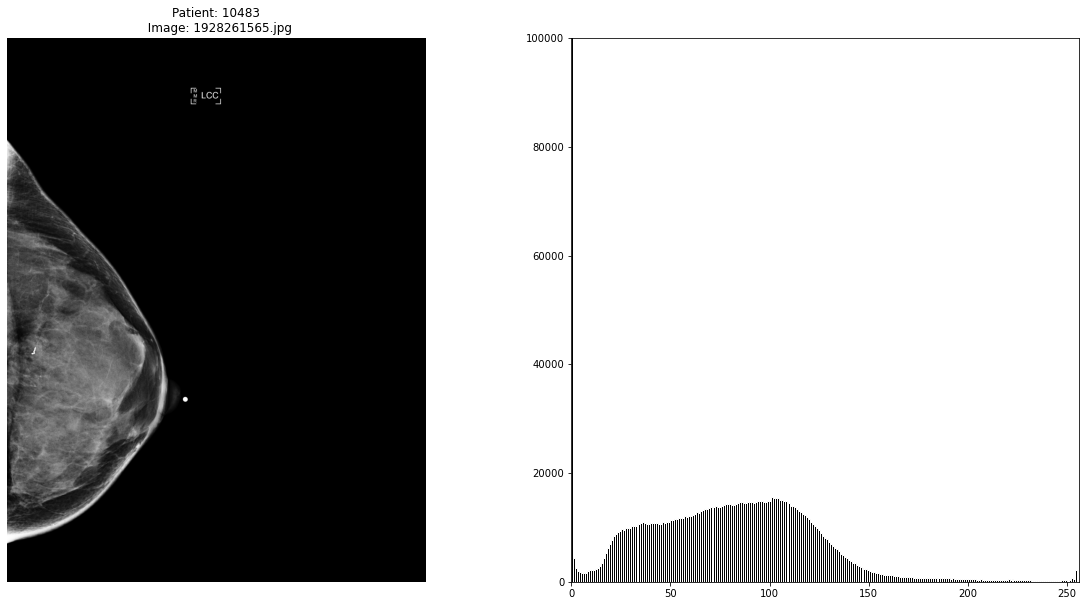

In [108]:
n_patient = 100

parent_dir = '../data/train_images_jpeg/'
patients = sorted(os.listdir('../data/train_images_jpeg/'))
images_patient_1 = os.listdir(parent_dir + patients[n_patient])
    
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
im1 = cv2.imread(parent_dir + patients[n_patient] + '/' + images_patient_1[0], cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([im1], [0], None, [256], [0,256])
plt.imshow(im1, 'gray')
plt.axis('off')
plt.title('Patient: ' + patients[n_patient] + '\n  Image: ' + images_patient_1[0])
plt.subplot(1,2,2)
plt.hist(im1.ravel(), 256, fc='k', ec='w')
# plt.bar(range(256), hist.ravel())
plt.xlim([0,256])
plt.ylim([0, 100000])

In [96]:
hist

array([[3.898745e+06],
       [4.134000e+03],
       [2.962000e+03],
       [2.547000e+03],
       [2.377000e+03],
       [2.063000e+03],
       [2.104000e+03],
       [2.172000e+03],
       [2.054000e+03],
       [2.100000e+03],
       [2.127000e+03],
       [2.182000e+03],
       [2.230000e+03],
       [2.216000e+03],
       [2.359000e+03],
       [2.223000e+03],
       [2.154000e+03],
       [2.593000e+03],
       [2.965000e+03],
       [3.914000e+03],
       [4.962000e+03],
       [6.128000e+03],
       [7.821000e+03],
       [9.300000e+03],
       [1.026500e+04],
       [1.158100e+04],
       [1.308800e+04],
       [1.479800e+04],
       [1.615900e+04],
       [1.704200e+04],
       [1.769700e+04],
       [1.797700e+04],
       [1.816800e+04],
       [1.797700e+04],
       [1.759200e+04],
       [1.719700e+04],
       [1.641100e+04],
       [1.550300e+04],
       [1.457800e+04],
       [1.367300e+04],
       [1.274100e+04],
       [1.248100e+04],
       [1.202000e+04],
       [1.1